# Optimización utilizando Descenso del Gradiente en Dos Variables
En este laboratorio, implementarás y visualizarás el método del descenso del gradiente optimizando algunas funciones en dos variables. Tendrás la oportunidad de experimentar con los parámetros iniciales e investigar los resultados y limitaciones del método.

# Tabla de Contenidos

- [ 1 - Función con un Mínimo Global](#1)
- [ 2 - Función con Múltiples Mínimos](#2)

## Paquetes

Ejecuta la siguiente celda para cargar los paquetes que necesitarás.



In [2]:
import numpy as np
import matplotlib.pyplot as plt


<a name='1'></a>
## 1 - Función con un Mínimo Global

Vamos a explorar un ejemplo simple de una función en dos variables $f\left(x, y\right)$ con un mínimo global. Tal función se discutió en clase.



In [3]:
def f_example_1(x,y):
    x_square = np.square(x)
    y_square = np.square(y)

    return 85-(1/90)*x_square*(x-6)*y_square*(y-6)

In [4]:
x = 0.5
y = 0.6
print( f_example_1(x,y) )

84.9703


In [5]:
def gen_values(low_limit, high_limit, num_samples):

    values = np.linspace(low_limit, high_limit, num=num_samples)

    return  values

x_values = gen_values(low_limit=0.01, high_limit = 5, num_samples =50)
y_values = gen_values(low_limit=0.01, high_limit = 5, num_samples =50)

x_values, y_values = np.meshgrid(x_values, y_values)

z_values =  f_example_1 (x_values, y_values)

La función $f\left(x\right)$ tiene un mínimo global. Grafiquemos la función:
  

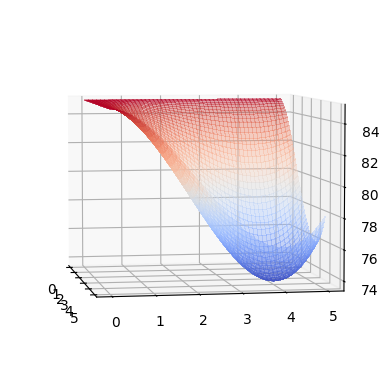

In [6]:
def plot_surface( x_values, y_values ,z_values, points = None ):

  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

  from matplotlib import cm
  surf = ax.plot_surface(x_values, y_values, z_values,
                        #cmap=cm.colors.coolwarm,
                        cmap='coolwarm',
                        linewidth=0,
                        antialiased=False,
                        alpha=0.4)

  ax.view_init( elev=5, azim=-10)

  plt.show()

plot_surface( x_values, y_values ,z_values, points = None )

Para encontrar el mínimo, puedes implementar el descenso del gradiente partiendo desde el punto inicial $\left(x_0, y_0\right)$ y dando pasos iteración tras iteración utilizando las siguientes ecuaciones:

$$x_1 = x_0 - \alpha \frac{\partial f}{\partial x}(x_0, y_0),$$
$$y_1 = y_0 - \alpha \frac{\partial f}{\partial y}(x_0, y_0).\tag{1}$$

donde $\alpha>0$ es la tasa de aprendizaje. El número de iteraciones también es un parámetro. El método se implementa con el siguiente código:


In [7]:
def dfdx(x,y):
  y_square = np.square(y)
  return -(1/90)*x*(3*x-12)*y_square*(y-6)

def dfdy(x,y):
  x_square = np.square(x)
  return -(1/90)*x_square*(x-6)*y*(3*y-12)


El descenso del gradiente se puede implementar en la siguiente función:


In [8]:
def gradient_descent(dfdx, dfdy, x, y, learning_rate = 0.1, num_iterations = 100):
    for iteration in range(num_iterations):
        x, y = x - learning_rate * dfdx(x, y), y - learning_rate * dfdy(x, y)
    return x, y

Ahora, para optimizar la función, configura los parámetros `num_iterations`, `learning_rate`, `x_initial`, `y_initial` y ejecuta el descenso del gradiente:


In [9]:
num_iterations = 30; learning_rate = 0.25; x_initial = 0.5; y_initial = 0.6

print("Gradient descent result: x_min, y_min =",
      gradient_descent(dfdx, dfdy, x_initial, y_initial, learning_rate, num_iterations))

Gradient descent result: x_min, y_min = (4.0, 4.0)


Puedes ver la visualización ejecutando el siguiente código. Ten en cuenta que el descenso del gradiente en dos variables realiza pasos en el plano, en una dirección opuesta al vector de gradiente $\begin{bmatrix}\frac{\partial f}{\partial x}(x_0, y_0) \\ \frac{\partial f}{\partial y}(x_0, y_0)\end{bmatrix}$ con la tasa de aprendizaje $\alpha$ como factor de escala.

Descomentando diferentes líneas, puedes experimentar con varios conjuntos de valores de parámetros y los resultados correspondientes.

Realiza algunos experimentos y trata de explicar qué está sucediendo en cada uno de los casos.


In [10]:
def gradient_descent(fx, dfdx, dfdy, x, y, learning_rate = 0.1, num_iterations = 9900):

    x_grads = []
    y_grads = []
    z_grads = []

    x_grads.append(x)
    y_grads.append(y)
    z_grads.append( fx(x,y))

    for iteration in range(num_iterations):
        x, y = x - learning_rate * dfdx(x, y), y - learning_rate * dfdy(x, y)

        x_grads.append(x)
        y_grads.append(y)
        z_grads.append( fx(x,y))

    return x_grads, y_grads, z_grads

In [16]:
num_iterations = 9990; learning_rate = 0.001; x_initial = 0.5; y_initial = 0.6
#num_iterations = 20; learning_rate = 0.5; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.15; x_initial = 0.5; y_initial = 0.6
# num_iterations = 20; learning_rate = 0.15; x_initial = 3.5; y_initial = 3.6

x_grads, y_grads,z_grads = gradient_descent( f_example_1, dfdx, dfdy, x_initial, y_initial, learning_rate, num_iterations )


Graficar los puntos del gradiente:

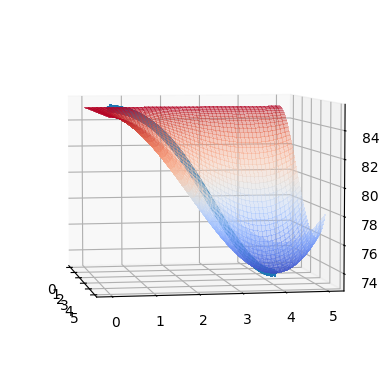

In [17]:
def plot_surface( x_values, y_values ,z_values, points_x, points_y, points_z ):

  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

  from matplotlib import cm

  ax.scatter(points_x, points_y, points_z, marker='*',alpha=0.9)

  surf = ax.plot_surface(x_values, y_values, z_values,
                        #cmap=cm.colors.coolwarm,
                        cmap='coolwarm',
                        linewidth=0,
                        antialiased=False,
                        alpha=0.4)

  ax.view_init( elev=5, azim=-10)

  plt.show()

plot_surface( x_values, y_values ,z_values, x_grads,y_grads,z_grads )

